<a href="https://colab.research.google.com/github/cjstntjd/machine/blob/master/housing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive',force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neopchi","key":"e9314cf98c2827f1e4630b82b2cd2508"}'}

In [0]:
!ls

kaggle.json  sample_data


In [0]:
ls -1ha kaggle.json

kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json
 
!kaggle competitions list

ref                                            deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started   Knowledge       2233           False  
titanic                                        2030-01-01 00:00:00  Getting Started   Knowledge      16331           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started   Knowledge       5393            True  
connectx                                       2030-01-01 00:00:00  Getting Started   Knowledge        185           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research          Knowledge         62           False  
competitive-data-science-predict-future-sales  2020-12-31 23:59:00  Playground            Kudos       5401           False  


In [0]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 66.6MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 13.2MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 60.7MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 29.4MB/s]


In [0]:
!ls

data_description.txt  sample_data	     test.csv
kaggle.json	      sample_submission.csv  train.csv


In [0]:
import pandas as pd

housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [0]:
housing['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [0]:
housing['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [0]:
housing['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [0]:
housing['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:
housing['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [0]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


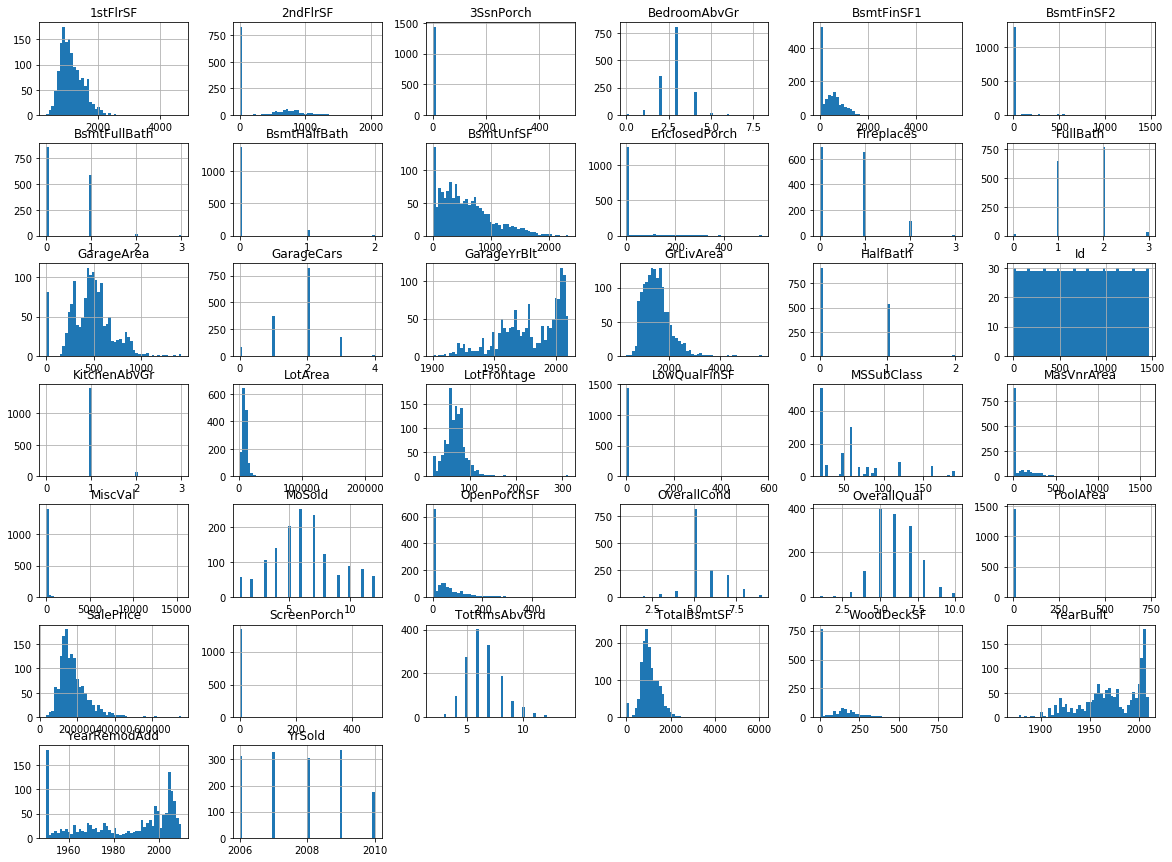

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50 , figsize=(20,15))
plt.show()

In [0]:
!ls

data_description.txt  sample_data	     test.csv
kaggle.json	      sample_submission.csv  train.csv


In [0]:
L=[]

file=open('data_description.txt','r')

lines=file.readlines()

file.close()

for i in range(len(lines)):
    L.append(lines[i].split('\n')[0])

print(L)

['MSSubClass: Identifies the type of dwelling involved in the sale.\t', '', '        20\t1-STORY 1946 & NEWER ALL STYLES', '        30\t1-STORY 1945 & OLDER', '        40\t1-STORY W/FINISHED ATTIC ALL AGES', '        45\t1-1/2 STORY - UNFINISHED ALL AGES', '        50\t1-1/2 STORY FINISHED ALL AGES', '        60\t2-STORY 1946 & NEWER', '        70\t2-STORY 1945 & OLDER', '        75\t2-1/2 STORY ALL AGES', '        80\tSPLIT OR MULTI-LEVEL', '        85\tSPLIT FOYER', '        90\tDUPLEX - ALL STYLES AND AGES', '       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER', '       150\t1-1/2 STORY PUD - ALL AGES', '       160\t2-STORY PUD - 1946 & NEWER', '       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES', '', 'MSZoning: Identifies the general zoning classification of the sale.', '\t\t', '       A\tAgriculture', '       C\tCommercial', '       FV\tFloating Village Residential', '       I\tIndustrial', '       RH\tResiden

In [0]:
corr_matrix = housing.corr()
corr_matrix['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd915797518>,
      dtype=object)

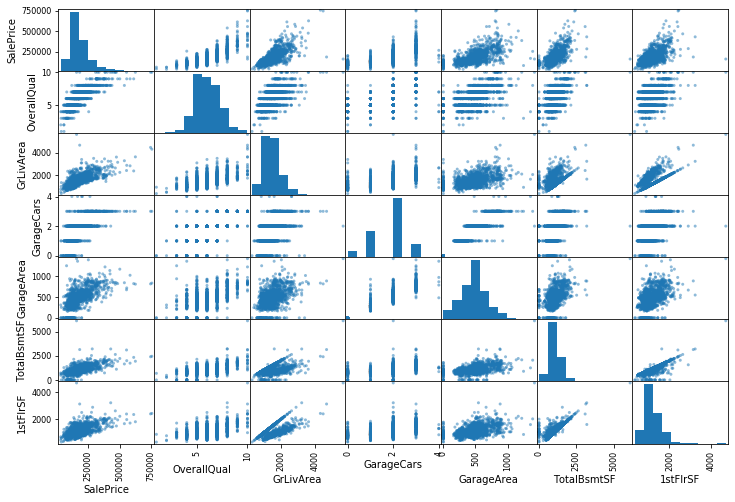

In [0]:
from pandas.plotting import scatter_matrix

attributes = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']
scatter_matrix(housing[attributes],figsize=(12,8))

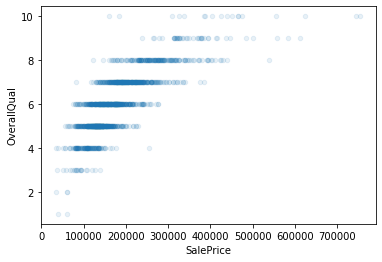

In [0]:
housing.plot(kind='scatter',x='SalePrice',y='OverallQual',alpha=0.1)
#overallqual =전반적인 품질
#전반적인 퀄리티도 가격에 비례함

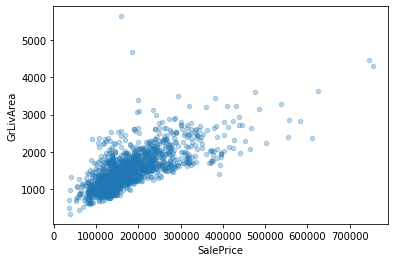

In [0]:
housing.plot(kind='scatter',x='SalePrice',y='GrLivArea',alpha=0.3)
#집값과 부지면적 간에 관계
#오른쪽 위에 보면 점 두개가 이상한거 빼고는 선형을 띄고 있는것 같음
#오른쪽 두개는 집은 넓은데 이상하게 싸게 팔린집

In [0]:
housing['SalePrice'].describe()
#최저 34900 최대 755000 예외처리할것은 없음 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

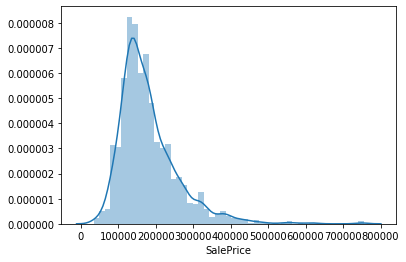

In [0]:
import seaborn as sns
sns.distplot(housing['SalePrice'])
#데이터는 이반적으로 정규 분포 형태를 띄는것이 가장 이상적임 
#이 경우는 positive skewness를 띄는것 같은데 확인해 봐야됨

In [0]:
housing['SalePrice'].skew()
#1.88가 큰수치인가? 아닌거 같음 굉장히 작은 수치 정규 분포를 따르고 있는것 같음 좋은 표본임


1.8828757597682129

In [0]:
housing['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

In [0]:
housing['GrLivArea'].skew()



1.3665603560164552

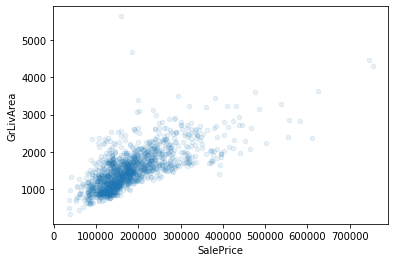

In [0]:
housing.plot(kind='scatter',x='SalePrice',y='GrLivArea',alpha=0.1)
#집값과 부지면적 간에 관계 = 선형관계

(-0.5, 9.5, 0, 800000)

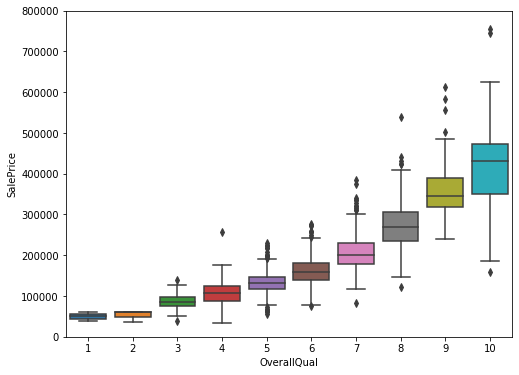

In [0]:
var = 'OverallQual'
data = pd.concat([housing['SalePrice'], housing[var]], axis=1)
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0,ymax=800000)


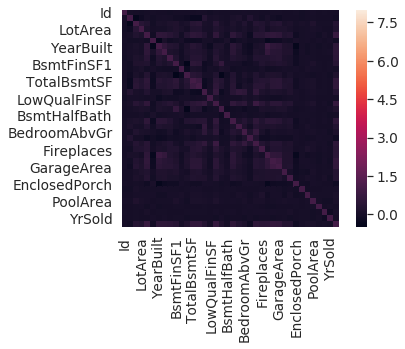

In [0]:
c_matrix = housing.corr()
sns.set(font_scale=1.25)
sns.heatmap(corr_matrix,vmax=8,square=True)
#비슷한 특징을 가지고 있는 corr가 높은 변수들은 삭제 해서 모델의 복잡도를 줄이는데 사용 됨


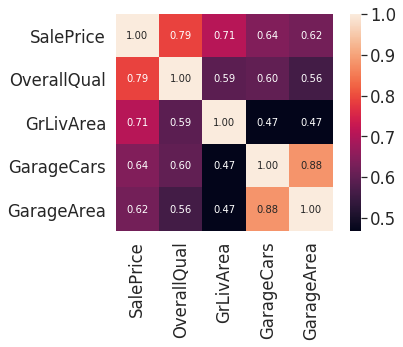

In [0]:
import numpy as np
var1 = 5
cols = c_matrix.nlargest(var1, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

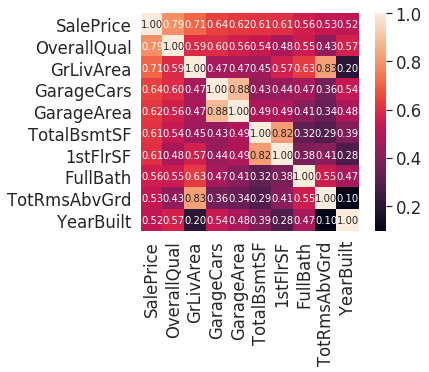

In [0]:
var2 = 10
cols = c_matrix.nlargest(var2, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [0]:
area_corr = housing.corr()
area_corr['GrLivArea'].sort_values(ascending = False)

GrLivArea        1.000000
TotRmsAbvGrd     0.825489
SalePrice        0.708624
2ndFlrSF         0.687501
FullBath         0.630012
OverallQual      0.593007
1stFlrSF         0.566024
BedroomAbvGr     0.521270
GarageArea       0.468997
GarageCars       0.467247
Fireplaces       0.461679
TotalBsmtSF      0.454868
HalfBath         0.415772
LotFrontage      0.402797
MasVnrArea       0.390857
OpenPorchSF      0.330224
YearRemodAdd     0.287389
LotArea          0.263116
WoodDeckSF       0.247433
BsmtUnfSF        0.240257
GarageYrBlt      0.231197
BsmtFinSF1       0.208171
YearBuilt        0.199010
PoolArea         0.170205
LowQualFinSF     0.134683
ScreenPorch      0.101510
KitchenAbvGr     0.100063
MSSubClass       0.074853
MoSold           0.050240
BsmtFullBath     0.034836
3SsnPorch        0.020643
EnclosedPorch    0.009113
Id               0.008273
MiscVal         -0.002416
BsmtFinSF2      -0.009640
BsmtHalfBath    -0.018918
YrSold          -0.036526
OverallCond     -0.079686
Name: GrLivA

In [0]:
total = housing.isnull().sum().sort_values(ascending=False)
#없는 값 찾아서 날리거나 평균 값으로 채워 넣기 해야 됨
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [0]:
housing['Exterior1st'].describe()

count        1460
unique         15
top       VinylSd
freq          515
Name: Exterior1st, dtype: object

In [0]:
housing['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64

In [0]:
housing['GarageType'].describe()

count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object

In [0]:
clear_housing = housing.drop((missing_data[missing_data['Total'] > 0]).index,1)
clear_housing.isnull().sum().max()

0

In [0]:
clear_housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [0]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
#0사분위수(Q0): 최소값
#1사분위수(Q1): 최소값 ~ 25% 번째 값
#2사분위수(Q2): 중앙값
#3사분위수(Q3): 중앙값 ~ 75% 번째 값
#4사분위수(Q4): 최대값

#IF 값 < (제1사분위수 - 1.5*사분위범위) OR (값 > 제3사분위수 + 1.5*사분위범위) THEN
#  RETURN 이상치
#ELSE
#  RETURN 보통치

#여기서  outliar를 제거 하는 시간을 갖도록 하자 

In [0]:
clear_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 62 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
ExterQual        1460 non-

In [0]:
clear_housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [0]:
clear_housing['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [0]:
clear_housing_1=clear_housing['Street'].factorize()

In [0]:
print(clear_housing_1)

(array([0, 0, 0, ..., 0, 0, 0]), Index(['Pave', 'Grvl'], dtype='object'))


In [0]:
clear_housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [0]:
clear_housing['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:
clear_housing['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [0]:
clear_housing=clear_housing.replace({'MSZoning':{'RL':0,'RM':1,'FV':2,'RH':3,'C (all)':4}})

In [0]:
clear_housing['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:
clear_housing=clear_housing.replace({'Street':{'Pave':0,'Grvl':1}, 'Lotshape':{'Reg':0,'IR1':1,'IR2':2,'IR3':3}})

In [0]:
clear_housing=clear_housing.replace({'LotShape':{'Reg':4,'IR1':3,'IR2':2,'IR3':1}})

In [0]:
clear_housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,8450,0,4,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,0,9600,0,4,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,0,11250,0,3,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,0,9550,0,3,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,0,14260,0,3,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [0]:
clear_housing['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [0]:
clear_housing=clear_housing.replace({'LandContour':{'Lvl':0,'Bnk':1,'HLS':2,'Low':3},'Utilities':{'AllPub':0,'NoSeWa':1}})

In [0]:
clear_housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,8450,0,4,0,0,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,0,9600,0,4,0,0,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,0,11250,0,3,0,0,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,0,9550,0,3,0,0,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,0,14260,0,3,0,0,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [0]:
clear_housing['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [0]:
clear_housing=clear_housing.replace({'LotConfig':{'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4}})

In [0]:
clear_housing=clear_housing.replace({'LandSlope':{'Gtl':1,'Mod':2,'Sev':3}})

In [0]:
clear_housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,8450,0,4,0,0,0,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,0,9600,0,4,0,0,3,1,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,0,11250,0,3,0,0,0,1,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,0,9550,0,3,0,0,1,1,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,0,14260,0,3,0,0,3,1,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [0]:
clear_housing['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [0]:
clear_housing=clear_housing.replace({'Neighborhood':{'NAmes':0,'CollgCr':1,'OldTown':2,'Edwards':3,'Somerst':4,'Gilbert':5,'NridgHt':6,'Sawyer':7,'NWAmes':8,'SawyerW':9,'BrkSide':10,'Crawfor':11,'Mitchel':12,'NoRidge':13,'Timber':14,'IDOTRR':15,'ClearCr':16,'SWISU':17,'StoneBr':18,'MeadowV':19,'Blmngtn':20,'BrDale':21,'Veenker':22,'NPkVill':23,'Blueste':24}})

In [0]:
clear_housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,8450,0,4,0,0,0,1,1,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,0,9600,0,4,0,0,3,1,22,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,0,11250,0,3,0,0,0,1,1,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,0,9550,0,3,0,0,1,1,11,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,0,14260,0,3,0,0,3,1,13,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [0]:
clear_housing['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [0]:
clear_housing=clear_housing.replace({'Condition1':{'Norm':0,'Feedr':1,'Artery':2,'RRAn':3,'PosN':4,'RRAe':5,'PosA':6,'RRNn':7,'RRNe':8}})

In [0]:
clear_housing['Condition2'].value_counts()

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

In [0]:
clear_housing=clear_housing.replace({'Condition2':{'Norm':0,'Feedr':1,'Artery':2,'RRAn':3,'PosN':4,'RRAe':5,'PosA':6,'RRNn':7}})

In [0]:
clear_housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,8450,0,4,0,0,0,1,1,0,0,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,0,9600,0,4,0,0,3,1,22,1,0,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,0,11250,0,3,0,0,0,1,1,0,0,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,0,9550,0,3,0,0,1,1,11,0,0,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,0,14260,0,3,0,0,3,1,13,0,0,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [0]:
clear_housing['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [0]:
clear_housing=clear_housing.replace({'BldgType':{'1Fam':0,'TwnhsE':1,'Duplex':2,'Twnhs':3,'2fmCon':4}})

In [0]:
clear_housing=clear_housing.replace({'HouseStyle':{'1Story':0,'2Story':1,'1.5Fin':2,'SLvl':3,'SFoyer':4,'1.5Unf':5,'2.5Unf':6,'2.5Fin':7}})

In [0]:
clear_housing=clear_housing.replace({'RoofStyle':{'Gable':0,'Hip':1,'Flat':2,'Gambrel':3,'Mansard':4,'Shed':5}})

In [0]:
clear_housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,8450,0,4,0,0,0,1,1,0,0,0,1,7,5,2003,2003,0,CompShg,VinylSd,VinylSd,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,0,9600,0,4,0,0,3,1,22,1,0,0,0,6,8,1976,1976,0,CompShg,MetalSd,MetalSd,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,0,11250,0,3,0,0,0,1,1,0,0,0,1,7,5,2001,2002,0,CompShg,VinylSd,VinylSd,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,0,9550,0,3,0,0,1,1,11,0,0,0,1,7,5,1915,1970,0,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,0,14260,0,3,0,0,3,1,13,0,0,0,1,8,5,2000,2000,0,CompShg,VinylSd,VinylSd,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [0]:
clear_housing['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [0]:
clear_housing=clear_housing.replace({'RoofMatl':{'CompShg':0,'Tar&Grv':1,'WdShngl':2,'WdShake':3,'Metal':4,'Roll':5,'Membran':6,'ClyTile':7}})

In [0]:
clear_housing=clear_housing.replace({'Exterior1st':{'VinylSd':0,'HdBoard':1,'MetalSd':2,'Wd Sdng':3,'Plywood':4,'CemntBd':5,'BrkFace':6,'WdShing':7,'Stucco':8,'AsbShng':9,'Stone':10,'BrkComm':11,'AsphShn':12,'CBlock':13,'ImStucc':14}})

In [0]:
clear_housing=clear_housing.replace({'Exterior2nd':{'VinylSd':0,'HdBoard':1,'MetalSd':2,'Wd Sdng':3,'Plywood':4,'CmentBd':5,'BrkFace':6,'Wd Shng':7,'Stucco':8,'AsbShng':9,'Stone':10,'Brk Cmn':11,'AsphShn':12,'CBlock':13,'ImStucc':14,'Other':15}})

In [0]:
clear_housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,8450,0,4,0,0,0,1,1,0,0,0,1,7,5,2003,2003,0,0,0,0,1,0,PConc,706,0,150,856,GasA,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,0,9600,0,4,0,0,3,1,22,1,0,0,0,6,8,1976,1976,0,0,2,2,0,0,CBlock,978,0,284,1262,GasA,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,0,11250,0,3,0,0,0,1,1,0,0,0,1,7,5,2001,2002,0,0,0,0,1,0,PConc,486,0,434,920,GasA,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,0,9550,0,3,0,0,1,1,11,0,0,0,1,7,5,1915,1970,0,0,3,7,0,0,BrkTil,216,0,540,756,GasA,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,0,14260,0,3,0,0,3,1,13,0,0,0,1,8,5,2000,2000,0,0,0,0,1,0,PConc,655,0,490,1145,GasA,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [0]:
clear_housing['Exterior1st'].value_counts()

0     515
1     222
2     220
3     206
4     108
5      61
6      50
7      26
8      25
9      20
11      2
10      2
14      1
13      1
12      1
Name: Exterior1st, dtype: int64

In [0]:
clear_housing=clear_housing.replace({'ExterQual':{'TA':0,'Gd':1,'Ex':2,'Fa':3}})


In [0]:
clear_housing=clear_housing.replace({'ExterCond':{'TA':0,'Gd':1,'Ex':2,'Fa':3,'Po':4}})


In [0]:
clear_housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,8450,0,4,0,0,0,1,1,0,0,0,1,7,5,2003,2003,0,0,0,0,1,0,0,706,0,150,856,0,2,Y,856,854,0,1710,1,0,2,1,3,1,1,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,0,9600,0,4,0,0,3,1,22,1,0,0,0,6,8,1976,1976,0,0,2,2,0,0,1,978,0,284,1262,0,2,Y,1262,0,0,1262,0,1,2,0,3,1,0,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,0,11250,0,3,0,0,0,1,1,0,0,0,1,7,5,2001,2002,0,0,0,0,1,0,0,486,0,434,920,0,2,Y,920,866,0,1786,1,0,2,1,3,1,1,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,0,9550,0,3,0,0,1,1,11,0,0,0,1,7,5,1915,1970,0,0,3,7,0,0,2,216,0,540,756,0,1,Y,961,756,0,1717,1,0,1,0,3,1,1,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,0,14260,0,3,0,0,3,1,13,0,0,0,1,8,5,2000,2000,0,0,0,0,1,0,0,655,0,490,1145,0,2,Y,1145,1053,0,2198,1,0,2,1,4,1,1,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [0]:
clear_housing['Functional'].value_counts()

0    1360
1      34
2      31
3      15
4      14
5       5
6       1
Name: Functional, dtype: int64

In [0]:
clear_housing=clear_housing.replace({'Heating':{'GasA':0,'GasW':1,'Grav':2,'Wall':3,'OthW':4,'Floor':5}})


In [0]:
clear_housing=clear_housing.replace({'Foundation':{'PConc':0,'CBlock':1,'BrkTil':2,'Slab':3,'Stone':4,'Wood':5}})


In [0]:
clear_housing=clear_housing.replace({'KitchenQual':{'TA':0,'Gd':1,'Ex':2,'Fa':3}})


In [0]:
clear_housing=clear_housing.replace({'HeatingQC':{'TA':0,'Gd':1,'Ex':2,'Fa':3,'Po':4}})


In [0]:
clear_housing=clear_housing.replace({'Functional':{'Typ':0,'Min2':1,'Min1':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6}})


In [0]:
clear_housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,8450,0,4,0,0,0,1,1,0,0,0,1,7,5,2003,2003,0,0,0,0,1,0,0,706,0,150,856,0,2,0,856,854,0,1710,1,0,2,1,3,1,1,8,0,0,2,548,0,0,61,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,9600,0,4,0,0,3,1,22,1,0,0,0,6,8,1976,1976,0,0,2,2,0,0,1,978,0,284,1262,0,2,0,1262,0,0,1262,0,1,2,0,3,1,0,6,0,1,2,460,0,298,0,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,11250,0,3,0,0,0,1,1,0,0,0,1,7,5,2001,2002,0,0,0,0,1,0,0,486,0,434,920,0,2,0,920,866,0,1786,1,0,2,1,3,1,1,6,0,1,2,608,0,0,42,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,9550,0,3,0,0,1,1,11,0,0,0,1,7,5,1915,1970,0,0,3,7,0,0,2,216,0,540,756,0,1,0,961,756,0,1717,1,0,1,0,3,1,1,7,0,1,3,642,0,0,35,272,0,0,0,0,2,2006,0,2,140000
4,5,60,0,14260,0,3,0,0,3,1,13,0,0,0,1,8,5,2000,2000,0,0,0,0,1,0,0,655,0,490,1145,0,2,0,1145,1053,0,2198,1,0,2,1,4,1,1,9,0,1,3,836,0,192,84,0,0,0,0,0,12,2008,0,0,250000


In [0]:
clear_housing['SaleCondition'].value_counts()

0    1198
1     125
2     101
3      20
4      12
5       4
Name: SaleCondition, dtype: int64

In [0]:
clear_housing=clear_housing.replace({'CentralAir':{'Y':0,'N':1}})


In [0]:
clear_housing=clear_housing.replace({'PavedDrive':{'Y':0,'N':1,'P':2}})


In [0]:
clear_housing=clear_housing.replace({'SaleType':{'WD':0,'New':1,'COD':2,'ConLD':3,'ConLw':4,'ConLI':5,'CWD':6,'Oth':7,'Con':8}})


In [0]:
clear_housing=clear_housing.replace({'SaleCondition':{'Normal':0,'Partial':1,'Abnorml':2,'Family':3,'Alloca':4,'AdjLand':5}})


In [0]:
#여기까지 해서 데이터 숫자로 변환함
#그 다음 해야 할것은 파생변수 만들기

In [0]:
clear_housing['OverallTotal']=clear_housing['OverallQual']*clear_housing['OverallCond']

In [0]:
clear_housing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallTotal,TotalFlrSF,TotalBath,TotalBsmtBath
0,1,60,0,8450,0,4,0,0,0,1,1,0,0,0,1,7,5,2003,2003,0,0,0,0,1,0,0,706,0,150,856,0,2,0,856,854,0,1710,1,0,2,1,3,1,1,8,0,0,2,548,0,0,61,0,0,0,0,0,2,2008,0,0,208500,35,1710,3,1
1,2,20,0,9600,0,4,0,0,3,1,22,1,0,0,0,6,8,1976,1976,0,0,2,2,0,0,1,978,0,284,1262,0,2,0,1262,0,0,1262,0,1,2,0,3,1,0,6,0,1,2,460,0,298,0,0,0,0,0,0,5,2007,0,0,181500,48,1262,2,1
2,3,60,0,11250,0,3,0,0,0,1,1,0,0,0,1,7,5,2001,2002,0,0,0,0,1,0,0,486,0,434,920,0,2,0,920,866,0,1786,1,0,2,1,3,1,1,6,0,1,2,608,0,0,42,0,0,0,0,0,9,2008,0,0,223500,35,1786,3,1
3,4,70,0,9550,0,3,0,0,1,1,11,0,0,0,1,7,5,1915,1970,0,0,3,7,0,0,2,216,0,540,756,0,1,0,961,756,0,1717,1,0,1,0,3,1,1,7,0,1,3,642,0,0,35,272,0,0,0,0,2,2006,0,2,140000,35,1717,1,1
4,5,60,0,14260,0,3,0,0,3,1,13,0,0,0,1,8,5,2000,2000,0,0,0,0,1,0,0,655,0,490,1145,0,2,0,1145,1053,0,2198,1,0,2,1,4,1,1,9,0,1,3,836,0,192,84,0,0,0,0,0,12,2008,0,0,250000,40,2198,3,1


In [0]:
clear_housing['TotalFlrSF']=clear_housing['1stFlrSF']+clear_housing['2ndFlrSF']

In [0]:
clear_housing['TotalBath']=clear_housing['FullBath']+clear_housing['HalfBath']


In [0]:
clear_housing['TotalBsmtBath']=clear_housing['BsmtFullBath']+clear_housing['BsmtHalfBath']


In [0]:
#상관관계 다시 봐보자
corr = clear_housing.corr()
corr.sort_values(['SalePrice'],ascending=False,inplace=True)
print(corr.SalePrice)

SalePrice      1.000000
OverallQual    0.790982
TotalFlrSF     0.716883
GrLivArea      0.708624
GarageCars     0.640409
                 ...   
BldgType      -0.173900
PavedDrive    -0.208954
CentralAir    -0.251328
LotShape      -0.267759
Foundation    -0.441842
Name: SalePrice, Length: 65, dtype: float64


In [0]:
clear_housing.isnull().sum().max()

0

In [0]:
#이상한 값들의 영향을 줄이는법 = log취하기
from scipy.stats import skew

Skew = clear_housing.apply(lambda x:skew(x))
Skew = Skew[abs(Skew)>0.5]
print(Skew.shape[0])
skew_feature = Skew.index
clear_housing2 = clear_housing.copy()
clear_housing2[skew_feature] = np.log1p(clear_housing2[skew_feature])

54


In [0]:
clear_housing['MSZoning'].value_counts()

0    1151
1     218
2      65
3      16
4      10
Name: MSZoning, dtype: int64

In [0]:
clear_housing2.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallTotal,TotalFlrSF,TotalBath,TotalBsmtBath
0,1,4.110874,0.0,9.042040,0.0,1.609438,0.0,0.0,0.000000,0.693147,0.693147,0.000000,0.0,0.0,0.693147,7,1.791759,7.602900,7.602900,0.0,0.0,0.000000,0.000000,0.693147,0.0,0.000000,6.561031,0.0,5.017280,6.753438,0.0,2,0.0,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,0.693147,2.197225,0.0,0.000000,2,548,0.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,0.0,0.000000,12.247699,35,7.444833,3,1
1,2,3.044522,0.0,9.169623,0.0,1.609438,0.0,0.0,1.386294,0.693147,3.135494,0.693147,0.0,0.0,0.000000,6,2.197225,7.589336,7.589336,0.0,0.0,1.098612,1.098612,0.000000,0.0,0.693147,6.886532,0.0,5.652489,7.141245,0.0,2,0.0,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,0.000000,1.945910,0.0,0.693147,2,460,0.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,0.0,0.000000,12.109016,48,7.141245,2,1
2,3,4.110874,0.0,9.328212,0.0,1.386294,0.0,0.0,0.000000,0.693147,0.693147,0.000000,0.0,0.0,0.693147,7,1.791759,7.601902,7.602401,0.0,0.0,0.000000,0.000000,0.693147,0.0,0.000000,6.188264,0.0,6.075346,6.825460,0.0,2,0.0,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,0.693147,1.945910,0.0,0.693147,2,608,0.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,0.0,0.000000,12.317171,35,7.488294,3,1
3,4,4.262680,0.0,9.164401,0.0,1.386294,0.0,0.0,0.693147,0.693147,2.484907,0.000000,0.0,0.0,0.693147,7,1.791759,7.557995,7.586296,0.0,0.0,1.386294,2.079442,0.000000,0.0,1.098612,5.379897,0.0,6.293419,6.629363,0.0,1,0.0,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,0.693147,2.079442,0.0,0.693147,3,642,0.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,0.0,1.098612,11.849405,35,7.448916,1,1
4,5,4.110874,0.0,9.565284,0.0,1.386294,0.0,0.0,1.386294,0.693147,2.639057,0.000000,0.0,0.0,0.693147,8,1.791759,7.601402,7.601402,0.0,0.0,0.000000,0.000000,0.693147,0.0,0.000000,6.486161,0.0,6.196444,7.044033,0.0,2,0.0,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,0.693147,2.302585,0.0,0.693147,3,836,0.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,0.0,0.000000,12.429220,40,7.695758,3,1


In [0]:
#훈련,검증셋으로 나눔
from sklearn.model_selection import cross_val_score, train_test_split

clear_housing2.SalePrice = np.log1p(clear_housing2.SalePrice)
y=clear_housing2.SalePrice

X_train,X_test,y_train,y_test = train_test_split(clear_housing2,y,test_size = 0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1168, 66)
(292, 66)
(1168,)
(292,)


In [0]:
#표준화 시켜보기
from sklearn.preprocessing import StandardScaler

num_f =clear_housing2.select_dtypes(exclude=['object']).columns
num_f = num_f.drop('SalePrice')

std = StandardScaler()
X_train.loc[:,num_f] = std.fit_transform(X_train.loc[:,num_f])
X_test.loc[:,num_f] = std.transform(X_test.loc[:,num_f])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
from sklearn.metrics import mean_squared_error,make_scorer

scorer = make_scorer(mean_squared_error,greater_is_better = False)

def rmse_cv_train(model):
  rmse=np.sqrt(-cross_val_score(model,X_train,y_train,scoring=scorer,cv=10))
  return(rmse)

def rmse_cv_test(model):
  rmse=np.sqrt(-cross_val_score(model,X_test,y_test,scoring=scorer,cv=10))
  return(rmse)

In [0]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV


lr = LinearRegression()
lr.fit(X_train, y_train)

print('rmse train', rmse_cv_train(lr).mean())
print('rmse test',rmse_cv_test(lr).mean())

rmse train 1.7161796768021293e-14
rmse test 4.8825918933790754e-15


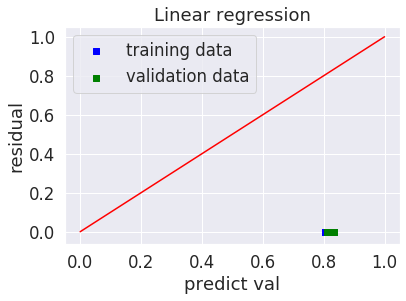

In [0]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_train_pred,y_train_pred - y_train,c='blue',marker='s',label='training data')
plt.scatter(y_test_pred,y_test_pred - y_test,c='green',marker='s',label='validation data')
plt.title('Linear regression')
plt.xlabel('predict val')
plt.ylabel('residual')
plt.legend(loc='upper left')
plt.plot([0,1],[0,1],c='red')

plt.show()

In [0]:
clear_housing2.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,OverallTotal,TotalFlrSF,TotalBath,TotalBsmtBath
0,1,4.110874,0.0,9.042040,0.0,1.609438,0.0,0.0,0.000000,0.693147,0.693147,0.000000,0.0,0.0,0.693147,7,1.791759,7.602900,7.602900,0.0,0.0,0.000000,0.000000,0.693147,0.0,0.000000,6.561031,0.0,5.017280,6.753438,0.0,2,0.0,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,0.693147,2.197225,0.0,0.000000,2,548,0.0,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,2,2008,0.0,0.000000,0.822609,35,7.444833,3,1
1,2,3.044522,0.0,9.169623,0.0,1.609438,0.0,0.0,1.386294,0.693147,3.135494,0.693147,0.0,0.0,0.000000,6,2.197225,7.589336,7.589336,0.0,0.0,1.098612,1.098612,0.000000,0.0,0.693147,6.886532,0.0,5.652489,7.141245,0.0,2,0.0,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,0.000000,1.945910,0.0,0.693147,2,460,0.0,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,5,2007,0.0,0.000000,0.821316,48,7.141245,2,1
2,3,4.110874,0.0,9.328212,0.0,1.386294,0.0,0.0,0.000000,0.693147,0.693147,0.000000,0.0,0.0,0.693147,7,1.791759,7.601902,7.602401,0.0,0.0,0.000000,0.000000,0.693147,0.0,0.000000,6.188264,0.0,6.075346,6.825460,0.0,2,0.0,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,0.693147,1.945910,0.0,0.693147,2,608,0.0,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.0,9,2008,0.0,0.000000,0.823249,35,7.488294,3,1
3,4,4.262680,0.0,9.164401,0.0,1.386294,0.0,0.0,0.693147,0.693147,2.484907,0.000000,0.0,0.0,0.693147,7,1.791759,7.557995,7.586296,0.0,0.0,1.386294,2.079442,0.000000,0.0,1.098612,5.379897,0.0,6.293419,6.629363,0.0,1,0.0,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,0.693147,2.079442,0.0,0.693147,3,642,0.0,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.0,2,2006,0.0,1.098612,0.818844,35,7.448916,1,1
4,5,4.110874,0.0,9.565284,0.0,1.386294,0.0,0.0,1.386294,0.693147,2.639057,0.000000,0.0,0.0,0.693147,8,1.791759,7.601402,7.601402,0.0,0.0,0.000000,0.000000,0.693147,0.0,0.000000,6.486161,0.0,6.196444,7.044033,0.0,2,0.0,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,0.693147,2.302585,0.0,0.693147,3,836,0.0,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.0,12,2008,0.0,0.000000,0.824272,40,7.695758,3,1
